In [2]:
import os

In [3]:
%pwd

'd:\\ML_Projects\\Resume Project\\Project_6_insurance_claim_prediction\\reasearch'

In [4]:
os.chdir("../")

In [5]:
%pwd

'd:\\ML_Projects\\Resume Project\\Project_6_insurance_claim_prediction'

In [6]:
# Entity
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class ModelTrainingConfig:
    root_dir: Path
    train_data_path: Path
    test_data_path: Path
    model_name: str
    alpha: float # params.yaml  
    l1_ratio: float # params.yaml
    target_column: str # Schema.yaml




In [7]:
# prepare confuguration manager class
from src.mlproject.constants import *
from src.mlproject.utils.common import read_yaml,create_directories

In [8]:
class ConfigurationManager:
    def __init__(self,
                 config_filepath = CONFIG_FILE_PATH,
                 params_filepath = PARAMS_FILE_PATH,
                 schema_filepath = SCHEMA_FILE_PATH):
        
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    def get_model_trainer_config(self) -> ModelTrainingConfig:
        config =  self.config.model_trainer
        params = self.params.ElasticNet
        schema = self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        model_trainer_config = ModelTrainingConfig(
            root_dir = config.root_dir,
            train_data_path = config.train_data_path,
            test_data_path =  config.test_data_path,
            model_name = config.model_name,
            alpha = params.alpha, # params.yaml  
            l1_ratio = params.l1_ratio, # params.yaml
            target_column = schema.name # Schema.yaml
        )

        return model_trainer_config

In [21]:
import os
import pandas as pd
from src.mlproject.logging import logger
from sklearn.linear_model import ElasticNet
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
class ModelTrainer:
    def __init__(self,config: ModelTrainingConfig):
        self.config = config

    def train(self):
        train_data = pd.read_csv(self.config.train_data_path)
        test_data = pd.read_csv(self.config.test_data_path)

        
        train_X = train_data.drop([self.config.target_column],axis=1)
        test_X = test_data.drop([self.config.target_column],axis=1)
        train_y = train_data[[self.config.target_column]]
        test_y = test_data[[self.config.target_column]]
        # print(train_X)
        print("y_test",test_y)

        lr = ElasticNet(alpha=self.config.alpha,l1_ratio=self.config.l1_ratio,random_state=42)
        lr.fit(train_X,train_y)
        y_pred = lr.predict(test_X)

        # plt.(train_y,y_test)
        plt.scatter(x=test_y,y= y_pred)
        print("y_pred",y_pred)
                

        # joblib.dump(lr, os.path.join(self.config.root_dir,self.config.model_name))

[2025-04-10 21:06:16,229: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-04-10 21:06:16,232: INFO: common: yaml file: params.yaml loaded successfully]
[2025-04-10 21:06:16,235: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-04-10 21:06:16,237: INFO: common: Created directory at: artifacts]
[2025-04-10 21:06:16,238: INFO: common: Created directory at: artifacts/model_trainer]
y_test          charges
0    28868.66390
1     2498.41440
2     9583.89330
3     8569.86180
4     9249.49520
..           ...
688  34672.14720
689   3659.34600
690   4454.40265
691   6548.19505
692  36219.40545

[693 rows x 1 columns]
y_pred [25312.61670739  9180.22866411 14820.2174961  18082.57095728
 12577.85333985 10816.54619734  5262.00617177  3911.82991237
  9532.07370753 18805.45114879 14837.69543229 19531.80007471
 24826.75448871  3832.55317899 12407.94415242 16559.08891071
  5174.59954035 14641.37222902 13017.82615273 14615.90676955
 22599.67127265  9570.24115811 105

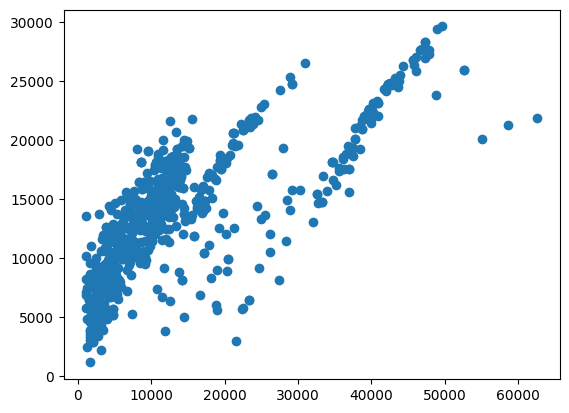

In [39]:
# Pipeline
try:
    config = ConfigurationManager()
    model_trainer_config = config.get_model_trainer_config()
    model_trainer_config = ModelTrainer(config=model_trainer_config)
    model_trainer_config.train()
except Exception as e:
    raise e